In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [5]:
w1=2.4
w2=-4.9
theta= np.array([w1,w2])
learning_rate=0.01
iterations=1000

In [6]:
data= pd.read_csv('C:\\Users\\jaisankar\\Downloads\\logisticregression.csv')
data.head()

,x1,x2,y
0,3,2,0
1,3,3,0
2,5,1,1
3,1,3,0
4,2,1,0


In [7]:
X= data.drop(['y'],axis=1)
Y= data['y']
X.head()

,x1,x2
0,3,2
1,3,3
2,5,1
3,1,3
4,2,1


In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X,Y,theta):
  n=len(X)
  z=np.dot(X,theta)
  y_pred= sigmoid(z)
  cost = -1/n * np.sum(Y * np.log10(y_pred+1e-30) + (1-Y) * np.log10(1-y_pred+1e-30))

  return cost
#Initial cost 
cost_initial= compute_cost(X,Y,theta)
print("initial cost=",cost_initial)

initial cost= 0.039007677521182144


In [9]:
def percentage_difference(value1, value2):
    return ((value1 - value2)/((value1+value2)/2))*100

In [10]:
def gradient_descent(X, Y, theta, learning_rate, iterations, batch_size):
    m = len(Y)
    costs = []
    cost_initial= compute_cost(X,Y,theta)
    j=1
    while True:
        if batch_size == m:  
            X_batch, y_batch = X, Y
        
        z=np.dot(X,theta)
        #calculating y_predicted
        h = sigmoid(z)
        gradient = np.dot(X_batch.T, (h - y_batch)) / batch_size
        theta =theta- learning_rate * gradient.flatten()

        cost = compute_cost(X_batch, y_batch, theta)
        #calculating the percentage difference between the costs
        #stopping the algorithm if the difference between the costs for 10 consecutive epochs are less
        if(percentage_difference(cost_initial,cost)<0.001):
            count+=1
        else:
            count=0
        if(count==10):
            break
        cost_initial=cost
        costs.append(cost)
        
        if(j%500==0):
            print("Epoch : ",j," w1 = ",theta[0]," w2 = ",theta[1]," cost = ",cost)
        j+=1
        
    return theta, costs

Weights, costs= gradient_descent(X,Y,theta,learning_rate,iterations,batch_size=len(Y))
print("updated weights=",Weights)
print("final cost",compute_cost(X,Y,Weights))

Epoch :  500  w1 =  2.1669384043104016  w2 =  -5.083225130032429  cost =  0.029931128370667692
Epoch :  1000  w1 =  2.1423923658858066  w2 =  -5.171789853703257  cost =  0.029138381412151013
Epoch :  1500  w1 =  2.159242236733026  w2 =  -5.241410642940528  cost =  0.028690530212702382
Epoch :  2000  w1 =  2.1835532154127475  w2 =  -5.306336012365832  cost =  0.028272972173426003
Epoch :  2500  w1 =  2.2088610362505485  w2 =  -5.369310357887275  cost =  0.027872869340956605
Epoch :  3000  w1 =  2.233951176081456  w2 =  -5.430912797535707  cost =  0.027488567912933883
Epoch :  3500  w1 =  2.2586075884408823  w2 =  -5.491306786002915  cost =  0.027118946726437776
Epoch :  4000  w1 =  2.282806367937283  w2 =  -5.550571115292564  cost =  0.02676300910667327
Epoch :  4500  w1 =  2.3065602514814043  w2 =  -5.6087641777654405  cost =  0.02641985434981822
Epoch :  5000  w1 =  2.3298880885208844  w2 =  -5.665937013251059  cost =  0.026088665583730047
Epoch :  5500  w1 =  2.352808816240372  w2 = 

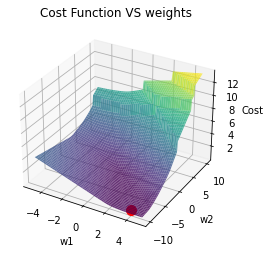

In [11]:
#plot the 3D surface
w1_vals = np.linspace(-5, 5, 100)
w2_vals = np.linspace(-10, 10, 100)
w1_mesh, w2_mesh = np.meshgrid(w1_vals, w2_vals)
cost_vals = np.array([compute_cost(X, Y, np.array([w1, w2])) for w1, w2 in zip(w1_mesh.flatten(), w2_mesh.flatten())])
cost_mesh = cost_vals.reshape(w1_mesh.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w1_mesh, w2_mesh, cost_mesh, cmap='viridis', alpha=0.8)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Cost Function VS weights')
ax.plot(Weights[0], Weights[1], compute_cost(X, Y, Weights), marker='o', color='r', markersize=10, label='Optimization Path')


plt.show()

In [12]:
print("Average cost for gradient descent",compute_cost(X,Y,Weights))

Average cost for gradient descent 0.013342720840907877


In [13]:
#Making predictions
def predict(X,theta):
    prob = sigmoid(np.dot(X,theta))
    
    prediction = 1 if prob >= 0.5 else 0
    
    return prediction

In [22]:
x1=7
x2=7
x=np.array([x1,x2])
_y = predict(x,Weights)
print(f"x1={x1},x2={x2}, y={_y}")

x1=7,x2=7, y=0


In [15]:
data.head(10)

,x1,x2,y
0,3,2,0
1,3,3,0
2,5,1,1
3,1,3,0
4,2,1,0
5,6,4,0
6,3,1,1
7,1,5,0
8,5,1,1
9,1,1,0


epoch= 3
updated weights= [ 2.5 -4.9]


Average cost for mini-batch gradient descent 0.041094179571339685
